In [1]:
# import the dependencies
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string as st
from sklearn.svm import SVR
import sys
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
ticker = input('Enter stock ticker: ')
start = input('Enter startdate in yyyy-mm-dd format or leave blank: ')
end = input('Enter enddate in yyyy-mm-dd format or leave blank: ')
data = yf.download(ticker,start=start, end=end)
data

Enter stock ticker: AMZN
Enter startdate in yyyy-mm-dd format or leave blank: 2020-03-01
Enter enddate in yyyy-mm-dd format or leave blank: 2020-04-01
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1906.489990,1954.510010,1870.000000,1953.949951,1953.949951,6761700
2020-03-03,1975.369995,1996.329956,1888.089966,1908.989990,1908.989990,7534500
2020-03-04,1946.569946,1978.000000,1922.000000,1975.829956,1975.829956,4772900
2020-03-05,1933.000000,1960.719971,1910.000000,1924.030029,1924.030029,4748200
2020-03-06,1875.000000,1910.869995,1869.500000,1901.089966,1901.089966,5273600
2020-03-09,1773.859985,1862.770020,1761.290039,1800.609985,1800.609985,7813200
2020-03-10,1870.880005,1894.270020,1818.170044,1891.819946,1891.819946,7133300
2020-03-11,1857.849976,1871.319946,1801.500000,1820.859985,1820.859985,5624800
2020-03-12,1721.979980,1765.000000,1675.000000,1676.609985,1676.609985,11346200


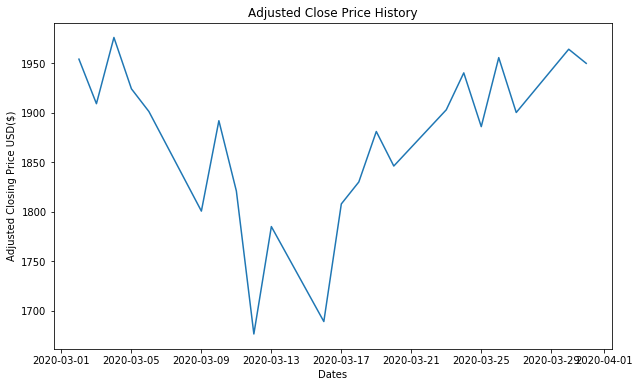

In [23]:
# Visualised the adjusted closing price history since 2010 
plt.figure(figsize=(10,6))
plt.title("Adjusted Close Price History")
plt.plot(data['Adj Close']) 
plt.xlabel('Dates')
plt.ylabel('Adjusted Closing Price USD($)')
plt.savefig("Images/adjustedclosingprice-model.png")
plt.show()


In [6]:
# check column whether date column is also the index
column_list = list(data)
column_list

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [3]:
# Save df to CSV to remove date column from being index column
data.to_csv('data.csv', index=True)

html_data = data.to_html()
data.to_html('data.html')

In [7]:
# Read the data from CSV into pandas dataframe
data= pd.read_csv("data.csv")


In [9]:
# create a list to represent X and y variables(x=dependent i.e:dates and y=independent=open_prices)
dates = []
prices = []


In [10]:
# Check how many rows and column is the df
data.shape

(22, 7)

In [11]:
# This is the last row of the dataset which the models will be tested on
data.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
21,2020-03-31,1964.349976,1993.02002,1944.01001,1949.719971,1949.719971,5123600


In [12]:
data = data.head(len(data)-1)

In [13]:
data.shape

(21, 7)

In [14]:
data_dates = data.loc[:,'Date']
data_open = data.loc[:,'Open']

In [15]:
for date in data_dates:
    dates.append([int(date.split('-')[2])])
for open_price in data_open:
    prices.append(float(open_price))

In [16]:
print(dates,prices)


[[2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30]] [1906.489990234375, 1975.3699951171875, 1946.5699462890625, 1933.0, 1875.0, 1773.8599853515625, 1870.8800048828125, 1857.8499755859373, 1721.97998046875, 1755.0, 1641.510009765625, 1775.469970703125, 1750.0, 1860.0, 1926.31005859375, 1827.75, 1951.5, 1920.68994140625, 1902.0, 1930.8599853515625, 1922.8299560546875]


In [17]:
# This is the function to make the prediction with 3 support vector regression models
def predict_prices(dates,prices, x):
    svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
    svr_lin = SVR(kernel='linear', C=100, gamma='scale')
    svr_poly = SVR(kernel='poly', C=100, gamma='scale', degree=3, epsilon=.1,
               coef0=1)
    
#Train the models on dates and prices   
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
# Plot the 3 models and find the best fit 
    plt.scatter(dates, prices, color ='black', label = 'Data')
    plt.plot(dates,svr_lin.predict(dates), color = 'green', label = 'Linear Model')
    plt.plot(dates,svr_poly.predict(dates),color = 'blue', label = 'Polynomial Model')
    plt.plot(dates,svr_rbf.predict(dates),color = 'red', label = 'RBF Model')
    plt.xlabel('date')
    plt.ylabel('price (USD$)')
    plt.title('support Vector regression')
    plt.legend()
    plt.savefig("Images/3SVR-models.png")
    plt.show
    return svr_lin.predict(x)[0],svr_rbf.predict(x)[0],svr_poly.predict(x)[0]




(1908.6500000000322, 1910.508164163097, 2096.386910981095)


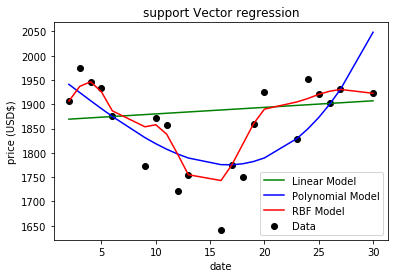

In [18]:
# Predict day 31st of march Amazon stock price
predicted_price = predict_prices(dates, prices,[[31]])
print(predicted_price)

In [19]:
def predict_prices(dates,prices, x):
    svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
    svr_rbf.fit(dates,prices)
    plt.scatter(dates, prices, color = 'black', label = 'Data')
    plt.plot(dates,svr_rbf.predict(dates),color = 'red', label = 'RBF Model')
    plt.title('SVR-Radial Basis Function (RBF) Model')
    plt.xlabel('date')
    plt.ylabel('price (USD$)')
    plt.legend()
    plt.savefig("Images/RBF-model.png")
    plt.show()
    return svr_rbf.predict(x)[0]


In [20]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(dates,prices)
R_square= svr_rbf.score(dates, prices)
print("RBF regression R-square = ",R_square)

RBF regression R-square =  0.759871821406584


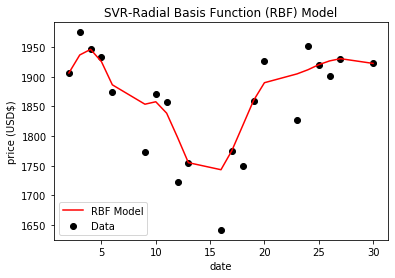

The predicted last day open price: USD$ 1910.508164163097


In [21]:
predicted_price = predict_prices(dates, prices,[[31]])
print("The predicted last day open price: USD$",predicted_price)



In [22]:
def predict_prices(dates,prices, x):
    svr_lin = SVR(kernel='linear', C=100, gamma='scale')
    
#Train the models on dates and prices   
    svr_lin.fit(dates,prices)
    plt.scatter(dates, prices, color = 'black', label = 'Data')
    plt.plot(dates,svr_lin.predict(dates), color = 'magenta', label = 'Linear Model')
    plt.title('SVR Linear Regression Model')
    plt.xlabel('date')
    plt.ylabel('price (USD$)')
    plt.legend()
    plt.savefig("Images/Linear-model.png")
    plt.show()
    return svr_lin.predict(x)[0]

    

In [23]:
svr_lin = SVR(kernel='linear', C=100, gamma='scale')
svr_lin.fit(dates,prices)
R_square= svr_lin.score(dates, prices)
print("Linear regression R-square = ",R_square)

Linear regression R-square =  -0.12102918330413459


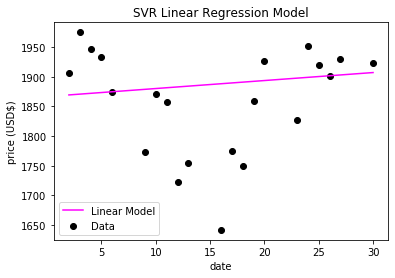

The predicted last day open price: USD$ 1908.6500000000322


In [24]:
predicted_price = predict_prices(dates, prices,[[31]])
print("The predicted last day open price: USD$",predicted_price)

In [25]:
def predict_prices(dates,prices, x):
    svr_poly = SVR(kernel='poly', C=100, gamma='scale', degree=3, epsilon=.1,
               coef0=1)
    
#Train the models on dates and prices   
    svr_poly.fit(dates,prices)
    plt.scatter(dates, prices, color = 'black', label = 'Data')
    plt.plot(dates,svr_poly.predict(dates),color = 'blue', label = 'Polynomial Model')
    plt.title('SVR-Polynomial Model')
    plt.xlabel('date')
    plt.ylabel('price USD$')
    plt.legend()
    plt.savefig("Images/Polynomial-model.png")
    plt.show()
    return svr_poly.predict(x)[0]

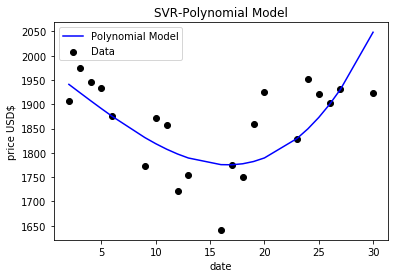

The predicted last day open price: USD$ 2096.386910981095


In [26]:
predicted_price = predict_prices(dates, prices,[[31]])
print("The predicted last day open price: USD$",predicted_price)


In [27]:
svr_poly = SVR(kernel='poly', C=100, gamma='scale', degree=3, epsilon=.1,
               coef0=1)
svr_poly.fit(dates,prices)
R_square= svr_poly.score(dates, prices)
print("Polynomial regression R-square = ",R_square)


Polynomial regression R-square =  0.41375895743467533
